## An quick introduction to Numpy and Pandas

### What is NumPy

NumPy is a python library that designed to work with N-dimensional arrays in python. You can use it to efficiently work with vectors or matrices up to arbitrary rank. Numpy has a special indexing syntax that makes working with arrays easier and provides an interface to heavily optimized fortran and C/C++ routines for doing matrix math. This has made NumPy one of the most used libarries in the scientific python stack.

### What is Pandas

Pandas is built on-top of NumPy and provides a higher-level interface to work with data series (like time series) as well as data in tabular format. Panda's provides data structures designed to work with heterogenous data types and allows for user-friendly indexing of data by allowing users to assign names to table columns and rows instead of having to reference them numerically. Panda's has routines for many common data munging tasks like dealing with missing entries, merging data, filtering data etc. 

### Credits
This tutorial is adapted from the excellent resources created by Jay Alammar. Array visualizations were created by Alammar. Goto  https://jalammar.github.io/visual-numpy/ and https://jalammar.github.io/gentle-visual-intro-to-data-analysis-python-pandas/ to see original tutorials

## Numpy basics

In [1]:
# First lets import the library
import numpy as np

In [2]:
# Create a simple 1-D array
data = np.array([1,2,3])
# Find the max of the array
dataMax = np.max(data)
# print values and type
print("data:",data, type(data))
print("dataMax:", dataMax, type(dataMax))

data: [1 2 3] <class 'numpy.ndarray'>
dataMax: 3 <class 'numpy.int64'>


## Visualization of a 1-d array
![1Dnumpy-array.png](./1Dnumpy-array.png)

## Other ways to initialize arrays

In [3]:
# Create an array of ones
onesArray = np.ones(3)
# Create an array of zeros
zerosArray = np.zeros(3)
# Create an array of random numbers sampled uniformly from [0,1)
randArray = np.random.random(3)

# print values and type
print("onesArray:", onesArray, type(onesArray))
print("zerosArray:", zerosArray, type(zerosArray))
print("randArray:", randArray, type(randArray))

onesArray: [1. 1. 1.] <class 'numpy.ndarray'>
zerosArray: [0. 0. 0.] <class 'numpy.ndarray'>
randArray: [0.90954408 0.92098905 0.17825036] <class 'numpy.ndarray'>


## Array arithmetic

Numpy allows us to do element-wise array arithmetic of same-sized arrays without writing loops.

In [4]:
# add arrays together
addedArray = data + onesArray

# print values and type
print("addedArray:", addedArray, type(addedArray))

addedArray: [2. 3. 4.] <class 'numpy.ndarray'>


![numpy-array-subtract-multiply-divide.png](./numpy-array-subtract-multiply-divide.png)

We can also "broadcast" scalars over each cell in an array

In [5]:
# multiply data array by a scalar
scaledArray = data * 3

print("scaledArray:", scaledArray, type(addedArray))

scaledArray: [3 6 9] <class 'numpy.ndarray'>


## Array indexing

NumPy gives us a syntax for efficiently accessing different parts of an array through "slices"

In [6]:
print("1st cell of data array:", data[0])
print("2nd cell of data array:", data[1])
print("2nd through 3rd cellS of data array:", data[1:3])
print("From second cell to end of array:", data[1:])

1st cell of data array: 1
2nd cell of data array: 2
2nd through 3rd cellS of data array: [2 3]
From second cell to end of array: [2 3]


![numpy-array-slice.png](./numpy-array-slice.png)

## Multi-dimensional arrays

In [7]:
# create a 2x2 matrix and explicitely assign values
simpleMat = np.array([[1,2],[3,4]])
print("simpleMat:\n", simpleMat, "\n", type(simpleMat))

simpleMat:
 [[1 2]
 [3 4]] 
 <class 'numpy.ndarray'>


![numpy-array-create-2d.png](./numpy-array-create-2d.png)

## Elementwise matrix arithmetic

All the elementwise operations that work on vectors also work on matrices.

In [8]:
# add our matrix to itself
simpleMatAdd = simpleMat + simpleMat
print(simpleMatAdd)

[[2 4]
 [6 8]]


## Matrix multiplication

In [9]:
#take the dot product of our data vector and a matrix holding powers of ten
dotmat = data.dot([[1,10],[100,1000],[10000,100000]])
print("dotmat:", dotmat) 

dotmat: [ 30201 302010]


![numpy-matrix-dot-product-1.png](./numpy-matrix-dot-product-1.png)

## Matrix indexing

In [10]:
# reassign data to a matrix
data = np.array([[1,2],[3,4],[5,6]])

# Access 2nd element of 1st row
print("2nd element:", data[0,1],"\n")

# Access 2nd and 3rd rows
print("2nd and 3rd rows:\n", data[1:3],"\n")

# Access 1st and 2nd rows of 1st column
print("2nd and 3rd rows:", data[0:2,0])

2nd element: 2 

2nd and 3rd rows:
 [[3 4]
 [5 6]] 

2nd and 3rd rows: [1 3]


![numpy-matrix-indexing.png](numpy-matrix-indexing.png)

## Aggregating along different matrix dimensions

In [11]:
colmax = data.max(axis=0)
rowmax = data.max(axis=1)
print("rowmax:", rowmax)
print("colmax:", colmax)

rowmax: [2 4 6]
colmax: [5 6]


![numpy-matrix-aggregation-4.png](./numpy-matrix-aggregation-4.png)

## Transposing and reshaping

In [12]:
#take the transpose
dataTran = data.T
print("dataTran:\n",dataTran, "\n")

#reshape matrix
dataSer = data.reshape(6)
print("dataSer:\n", dataSer)

dataTran:
 [[1 3 5]
 [2 4 6]] 

dataSer:
 [1 2 3 4 5 6]


## N-dimensional arrays

In [13]:
# make a 3d array
ThreeD = np.array([ [[1,2],[3,4]], [[5,6],[7,8]] ])
print("3D array:\n\n", ThreeD, "\n\n", ThreeD.shape)

3D array:

 [[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]] 

 (2, 2, 2)


![numpy-3d-array.png](./numpy-3d-array.png)

## Why is this useful?

### Performance

In [14]:
# Performance benefits of NumPy
import time

size_of_vec = 1000000

def pure_python_version():
    t1 = time.time()
    X = range(size_of_vec)
    Y = range(size_of_vec)
    Z = [X[i] + Y[i] for i in range(len(X)) ]
    return time.time() - t1

def numpy_version():
    t1 = time.time()
    X = np.arange(size_of_vec)
    Y = np.arange(size_of_vec)
    Z = X + Y
    return time.time() - t1

t1 = pure_python_version()
t2 = numpy_version()
print(t1, t2)
print("Numpy is in this example " + str(t1/t2) + " faster!")

0.2366352081298828 0.04533672332763672
Numpy is in this example 5.219503986200803 faster!


### Implementing formulas that require series of variables

$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$

![numpy-mse-1.png](numpy-mse-1.png)

### Quickly referencing data that is naturally represented as arrays

For example imagery or time series.

![numpy-color-image.png](./numpy-color-image.png)

## Panda basics

As we stated earlier Pandas is built on top of numpy but provides more functionality for working with spreadsheet like things in the form of Panda dataframes and series. Let's go over some basics of panda's now.

In [15]:
# Import pandas
import pandas as pd

### Creating or importing data

We can import data using panda's "read_csv" function. We can also create a dataframe like so:

In [45]:
# Create a dataframe
df = pd.DataFrame({'Artist':['Billie Holiday','Jimi Hendrix', 'Miles Davis', 'SIA'],
              'Genre': ['Jazz', 'Rock', 'Jazz', 'Pop'],
              'Listeners': [1300000, 2700000, 1500000, 2000000],
              'Plays': [27000000, np.nan, 48000000, 74000000]})

In [46]:
# Let's inspect the dataframe contents
df

,Artist,Genre,Listeners,Plays
0,Billie Holiday,Jazz,1300000,27000000.0
1,Jimi Hendrix,Rock,2700000,NaN
2,Miles Davis,Jazz,1500000,48000000.0
3,SIA,Pop,2000000,74000000.0


### Selecting data

In [37]:
# Select a column by it's label
df['Artist']

0    Billie Holiday
1      Jimi Hendrix
2       Miles Davis
3               SIA
Name: Artist, dtype: object

In [38]:
# Select multiple rows
df[0:2]

,Artist,Genre,Listeners,Plays
0,Billie Holiday,Jazz,1300000,27000000
1,Jimi Hendrix,Rock,2700000,NaN


In [39]:
# Select multiple a subset of rows in the "Artist" column
df.loc[1:3,['Artist']]

,Artist
1,Jimi Hendrix
2,Miles Davis
3,SIA


### Filtering data

We can filter data based on different criteria.

In [40]:
df[df['Genre'] == 'Jazz']

,Artist,Genre,Listeners,Plays
0,Billie Holiday,Jazz,1300000,27000000
2,Miles Davis,Jazz,1500000,48000000


In [41]:
df[df['Listeners'] > 1800000]

,Artist,Genre,Listeners,Plays
1,Jimi Hendrix,Rock,2700000,NaN
3,SIA,Pop,2000000,74000000


### Dealing with missing values

In [47]:
df.dropna()

,Artist,Genre,Listeners,Plays
0,Billie Holiday,Jazz,1300000,27000000.0
2,Miles Davis,Jazz,1500000,48000000.0
3,SIA,Pop,2000000,74000000.0


In [53]:
df = df.fillna(70000000)

### Grouping

Panda's has very useful data folding functionality using it's groupby function

In [55]:
df.groupby('Genre').sum(numeric_only=True)

,Listeners,Plays
Genre,,
Jazz,2800000,75000000.0
Pop,2000000,74000000.0
Rock,2700000,70000000.0


### Adding new columns

In [57]:
df['Avg Plays'] = df['Plays']/df['Listeners']

In [58]:
df

,Artist,Genre,Listeners,Plays,Avg Plays
0,Billie Holiday,Jazz,1300000,27000000.0,20.769231
1,Jimi Hendrix,Rock,2700000,70000000.0,25.925926
2,Miles Davis,Jazz,1500000,48000000.0,32.000000
3,SIA,Pop,2000000,74000000.0,37.000000


## Implementing the Game of Life in NumPy

Now that we have covered the basics of both NumPy and Pandas let's implement John Conway's game of life using NumPy and visualize the output using the Matplotlib plotting library. 

The game of life takes place on a board full of cells. Each cell interacts with its eight neighbors and transitions between states according to three simple rules:

A cell is born if it has exactly three neighbors.
A cell survives if it has two or three neighbors.
Otherwise, a cell dies or remains dead.

The Game of Life generates a wide variety of intricate emergent patterns. 

In [94]:
# Import matplotlib and HTML library to display animation
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from IPython.display import HTML

Now let's create a function that takes in a game board and populates that board with N random cells. To do this we define a function "add_random_cells" with two inputs:

1. "X" is a grid of zeros and ones or "dead" and "alive" cells
2. num_cells are the number of cells that we want to sample and assign a value of 1 for

A loop is initialized that repeats "num_cells" times that:

1. Calls numpy's randint function to generate random indices throughout the board. The first argument is 0, 2nd argument is max dimension of the square board, 3rd argument is the number of integers to be generated and returned as an array.
2. Assign's the randomly generated index to a value of 1 or "alive"

In [95]:
# Function to add random alive cells
def add_random_cells(X, num_cells, N):
    for _ in range(num_cells):
        i, j = np.random.randint(0, N, size=2)
        X[i, j] = 1
    return X

Now let's define a function that implements the rules of the game of life using numpy. This function "apply rules" applies numpy's "sum" and "roll" functions to reassign "dead" or "alive" status to cells based on their neighbor's state.

The main line is: 
```python
num_neighbors = np.sum(np.roll(np.roll(X, i, 0), j, 1) for i in (-1, 0, 1) for j in (-1, 0, 1)) - X
```

This line uses a double for loop to shift the grid to the left, right, up, and down and sum these shifted matrices together to get a cell's number of alive neighbors centered on the cell itself. You need to subtract X at the end because a cell can't be it's own neighbor in the game.

Then the line 
```python
return (num_neighbors == 3) | (X & (num_neighbors == 2))
```

Applies an "OR" condition (the "|" operator) to assign a value of 1/TRUE/alive to cells that have 3 or 2 neighbors. Cells with 3 neighors that are currently dead will be born while cells that have 2 neighors that are alive will stay alive.

In [96]:
# Game of Life rules
def apply_rules(X):
    num_neighbors = np.sum(np.roll(np.roll(X, i, 0), j, 1) for i in (-1, 0, 1) for j in (-1, 0, 1)) - X
    return (num_neighbors == 3) | (X & (num_neighbors == 2))

In [97]:
# Initialize a square, blank grid
N = 100
X = np.zeros((N, N), dtype=bool)

This next function creates a glider and then adds it to the board. A glider is a self-perpetuating pattern in the game that "glides" diagonally across the board. 

In [98]:
# Function to add a glider
def add_glider(X, i, j):
    glider_pattern = [(i, j+1), (i+1, j+2), (i+2, j), (i+2, j+1), (i+2, j+2)]
    for p in glider_pattern:
        X[p[0] % X.shape[0], p[1] % X.shape[1]] = 1
    return X

In [99]:
# Add 30 gliders at random positions
np.random.seed(42)  # Seed for reproducibility
for _ in range(30):
    i, j = np.random.randint(0, N, size=2)
    X = add_glider(X, i, j)

In [100]:
# Add 1000 random alive cells
X = add_random_cells(X, 1000, N)

Now let's animate our board and apply the rules for 100 steps of the game. To do this we will:

1. define a custom animation function "animate" that will be called from matplotlibs FuncAnimation function. The custom "animate" function uses "im.set_array" to update the frame with the current state of the board X. Then the board state is updated using the "apply_rules" function we created earlier. 
2. Initialize a matplotlib image and call it "im". "im" uses a binary color mapping is populated by our inital board state, and uses an interpolation scheme that will depict each cell in the X array as a single color block.
3. animate.X sets the inital state of the animation object to X.
4. We then create an animation object that will call the animation function for each ith frame up to frame 100

/tmp/ipykernel_202/2866967326.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  num_neighbors = np.sum(np.roll(np.roll(X, i, 0), j, 1) for i in (-1, 0, 1) for j in (-1, 0, 1)) - X


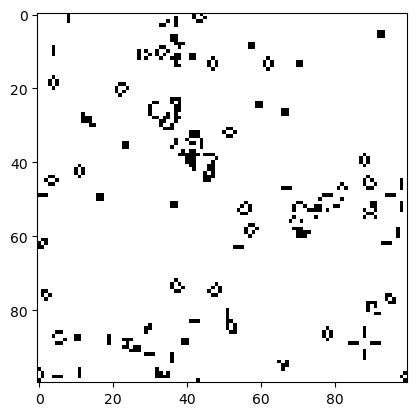

In [102]:
# Animate
fig, ax = plt.subplots()

def animate(i):
    im.set_array(animate.X)
    animate.X = apply_rules(animate.X)

im = ax.imshow(X, cmap=plt.cm.binary, interpolation='nearest')
animate.X = X

ani = animation.FuncAnimation(fig, animate, frames=100)

# Convert the animation to HTML
HTML(ani.to_jshtml())

## Working with titanic passenger data using pandas

In [103]:
# Load the dataset
titanic_df = pd.read_csv('titanic.csv')

Let's grouping the data by sex and passenger class. The mean function then calculates the average value in each group, which gives us the survival rate because the 'Survived' column contains 1s for survivors and 0s for non-survivors.

In [104]:
# Calculate the survival rate by sex and passenger class
survival_rates = titanic_df.groupby(['Sex', 'Pclass'])['Survived'].mean()

This groupby operation used both 'Sex' and 'Pclass' to group so the result is a multi-index series. That is a series where each value in the series has two diffrent indices. In this case each survival rate would have both 'Sex' and 'Pclass' indices assigned to it. We will use the "to_frame" function to convert this mult-index series to a dataframe for easier plotting and reset the index so that the rows indices are integers.

In [110]:
# Convert the multi-index series to a DataFrame and reset index
survival_rates_df = survival_rates.to_frame().reset_index()

In [111]:
survival_rates_df

,Sex,Pclass,Survived
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.135447


We now execute a pivot operation on the dataframe so that the data is row indexed by the passenger class, the column values are the values for "sex", and the values inside the dataframe are the survival rates. THis will make it easier for us to plot a bar chart showing the male and female survival rates for each passenger class.

In [112]:
# Pivot the DataFrame for easier plotting
survival_rates_pivot = survival_rates_df.pivot(index='Pclass', columns='Sex', values='Survived')
survival_rates_pivot

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


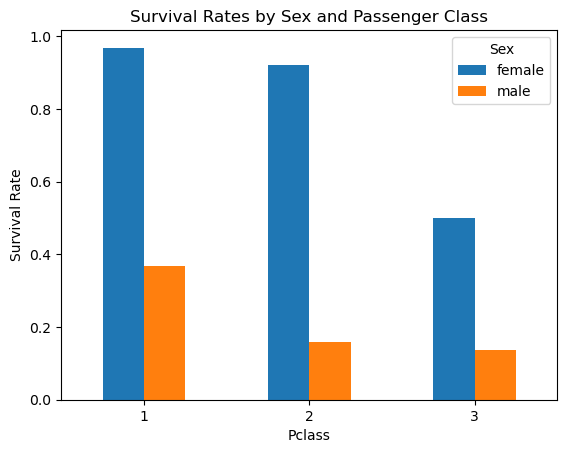

In [107]:
# Plot the survival rates
survival_rates_pivot.plot(kind='bar', title='Survival Rates by Sex and Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

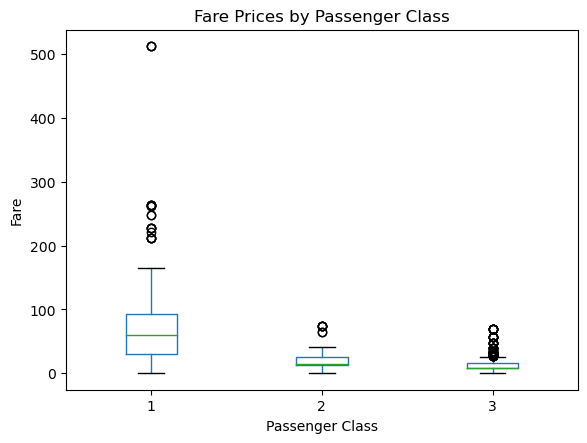

In [116]:
# Create a boxplot of fare prices for each passenger class
plt.figure(figsize=(10, 6))
titanic_df.boxplot(column='Fare', by='Pclass', grid=False)
plt.title('Fare Prices by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.suptitle('')  # Suppress the automatic title
plt.show()

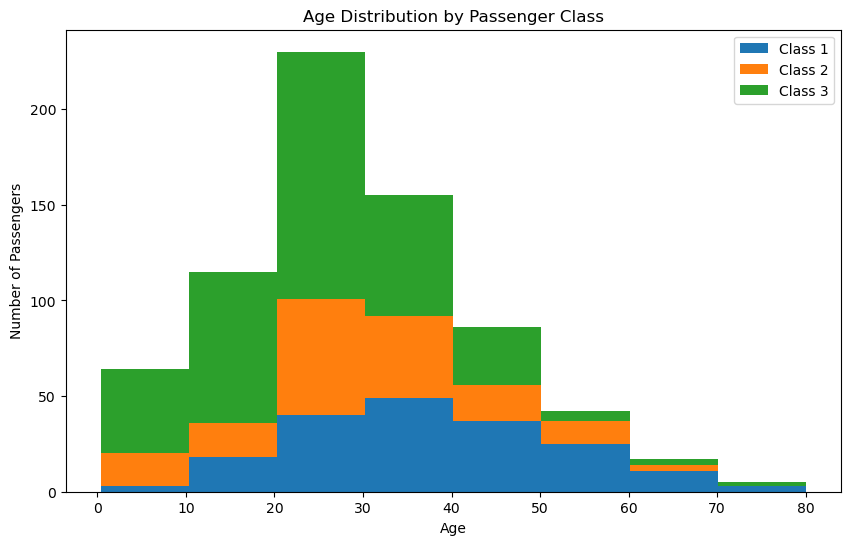

In [117]:
# Create separate data for each passenger class
class1 = titanic_df[titanic_df['Pclass'] == 1]['Age'].dropna()
class2 = titanic_df[titanic_df['Pclass'] == 2]['Age'].dropna()
class3 = titanic_df[titanic_df['Pclass'] == 3]['Age'].dropna()

# Create a histogram for each passenger class
plt.figure(figsize=(10, 6))
plt.hist([class1, class2, class3], bins=8, stacked=True, label=['Class 1', 'Class 2', 'Class 3'])
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

### Learning more about Panda's basic functionality
https://betterprogramming.pub/pandas-illustrated-the-definitive-visual-guide-to-pandas-c31fa921a43